This code is used to plot Scopus search metadata:

( ( TITLE-ABS ( cyber PRE/1 security ) OR AUTHKEY ( cyber PRE/1 security ) ) "AND/OR" ( TITLE-ABS ( cybersecurity ) OR AUTHKEY ( cybersecurity ) ) )

    YEAR  Count
30  1980      1
29  1985      2
28  1997      4
27  1998     10
26  1999     17


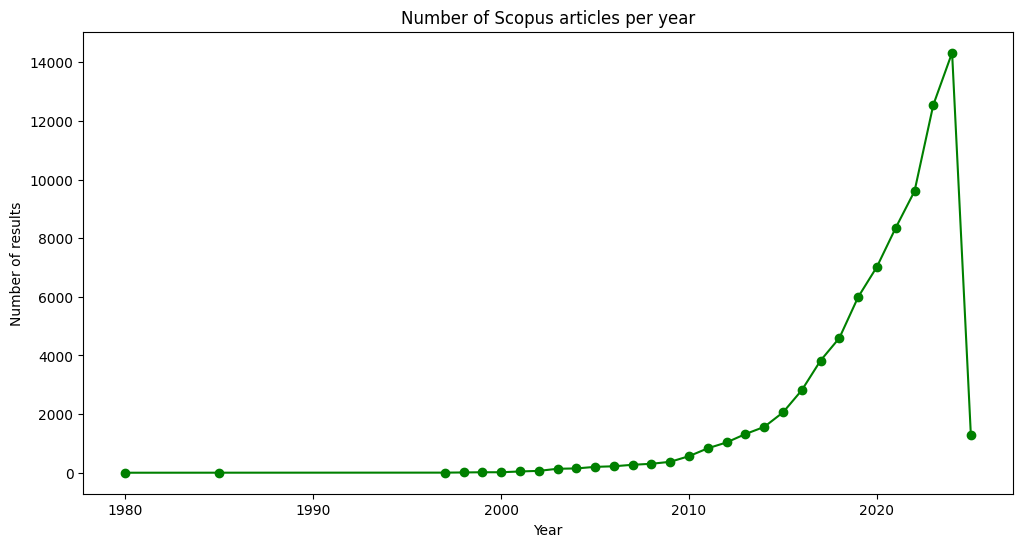

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV
csv_file = "Scopus-10-Analyze-Year.csv"

# Lecture du fichier CSV en sautant les 6 premières lignes (métadonnées)
df = pd.read_csv(csv_file, skiprows=6, header=0)

# Renommer les colonnes pour faciliter le traitement
df.columns = ['YEAR', 'Count']

# Conversion explicite en chaîne de caractères pour éviter l'erreur .str
df['YEAR'] = df['YEAR'].astype(str)
df['Count'] = df['Count'].astype(str)

# Nettoyage : suppression des guillemets et espaces superflus
df['YEAR'] = df['YEAR'].str.replace('\"', '').str.strip()
df['Count'] = df['Count'].str.replace('\"', '').str.strip()

# Conversion des colonnes en types numériques
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

# Tri des données par année
df = df.sort_values('YEAR')

# Affichage des premières lignes pour vérification
print(df.head())

# Tracé du graphique
plt.figure(figsize=(12, 6))
plt.plot(df['YEAR'], df['Count'], marker='o', linestyle='-', color='green')
plt.title('Number of Scopus articles per year')
plt.xlabel('Year')
plt.ylabel('Number of results')
plt.grid(False)
plt.show()


Colonnes lues : ['COUNTRY/TERRITORY', 'Unnamed: 1']


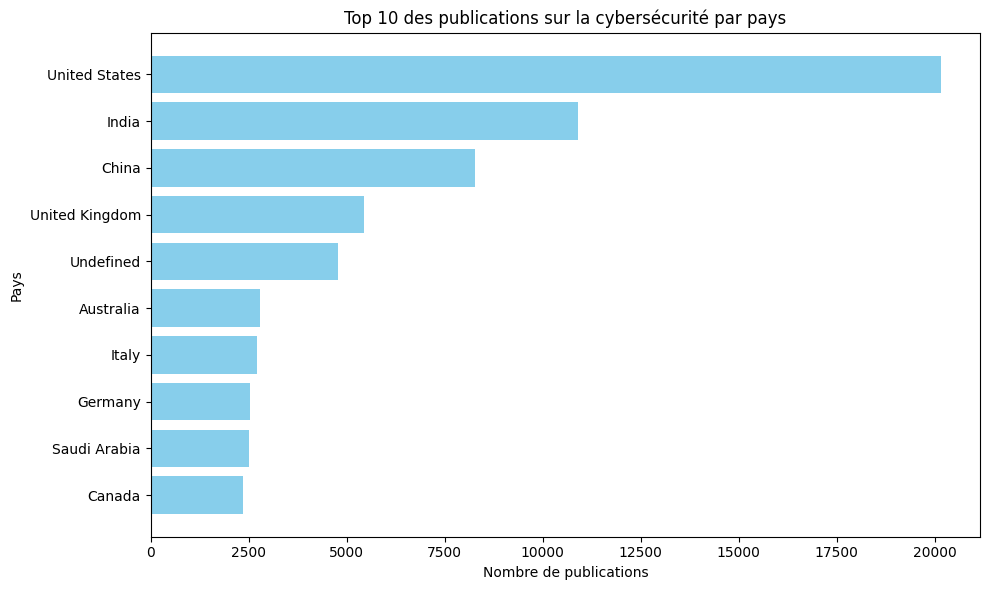

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV (assurez-vous que le fichier se trouve dans le même répertoire ou donnez le chemin complet)
csv_file = 'Scopus-10-Analyze-Country.csv'

df = pd.read_csv(csv_file, skiprows=6, header=0, quotechar='"', skipinitialspace=True)

# Affichage des colonnes lues pour vérifier la structure
print("Colonnes lues :", df.columns.tolist())

# Renommage des colonnes pour plus de clarté
df.columns = ['Country', 'Count']

# Nettoyage de la colonne 'Country'
df['Country'] = df['Country'].astype(str).str.strip('" ').str.strip()

# Conversion et nettoyage de la colonne 'Count'
df['Count'] = df['Count'].astype(str).str.strip('" ').str.strip()
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

# Trier les données par 'Count' décroissant et garder seulement les 10 premiers
top10 = df.sort_values('Count', ascending=False).head(10)

# Pour avoir le plus élevé en haut dans un diagramme horizontal, on trie par ordre croissant
top10 = top10.sort_values('Count', ascending=True)

# Création du diagramme en bâtons horizontaux
plt.figure(figsize=(10, 6))
plt.barh(top10['Country'], top10['Count'], color='skyblue')
plt.xlabel('Nombre de publications')
plt.ylabel('Pays')
plt.title('Top 10 des publications sur la cybersécurité par pays')
plt.subplots_adjust(left=0.3)  # Ajuste l'espace à gauche pour éviter le chevauchement des légendes
plt.tight_layout()
plt.show()
